In [50]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def roll_die(sides):
    if sides == 100:
        return random.randint(0, 99)
    else:
        return random.randint(1, sides)

def roll_dice(row, num_die, sides):
    total = 0

    for die in range(num_die):
        total += roll_die(sides)
    
    return total

def roll_dice_advantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return max(roll_one, roll_two)

def roll_dice_disadvantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return min(roll_one, roll_two)

In [51]:
df = pd.DataFrame(index=range(1000000))

df['ignore'] = 0
df['1d100'] = df.apply(roll_dice, num_die=1, sides=100, axis='columns')
df['1d100[+]'] = df.apply(roll_dice_advantage, num_die=1, sides=100, axis='columns')
df['1d100[-]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=100, axis='columns')
df.drop('ignore', axis=1, inplace=True)

In [52]:
total_dice = 4

for die in range(1, total_dice+1):
    df[f"{die}d10"] = df.apply(roll_dice, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[+]"] = df.apply(roll_dice_advantage, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[-]"] = df.apply(roll_dice_disadvantage, num_die=die, sides=10, axis='columns')

In [53]:
df['d20'] = df.apply(roll_dice, num_die=1, sides=20, axis='columns')
df['d20[+]'] = df.apply(roll_dice_advantage, num_die=1, sides=20, axis='columns')
df['d20[-]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=20, axis='columns')

In [54]:
df.describe()

,1d100,1d100[+],1d100[-],1d10,1d10[+],1d10[-],2d10,2d10[+],2d10[-],3d10,3d10[+],3d10[-],4d10,4d10[+],4d10[-],d20,d20[+],d20[-]
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,49.490033,66.159465,32.834112,5.499947,7.150895,3.849309,11.004310,13.319014,8.680882,16.491641,19.335164,13.671486,22.010887,25.262016,18.744957,10.497646,13.830117,7.176699
std,28.867967,23.575542,23.585093,2.873243,2.349961,2.349022,4.063404,3.336003,3.336349,4.977419,4.093900,4.090439,5.742909,4.729871,4.731777,5.768333,4.705907,4.714191
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000
25%,24.000000,50.000000,13.000000,3.000000,6.000000,2.000000,8.000000,11.000000,6.000000,13.000000,17.000000,11.000000,18.000000,22.000000,15.000000,5.000000,11.000000,3.000000
50%,49.000000,70.000000,29.000000,5.000000,8.000000,3.000000,11.000000,13.000000,9.000000,16.000000,19.000000,14.000000,22.000000,25.000000,19.000000,10.000000,15.000000,6.000000
75%,74.000000,86.000000,49.000000,8.000000,9.000000,5.000000,14.000000,16.000000,11.000000,20.000000,22.000000,16.000000,26.000000,29.000000,22.000000,16.000000,18.000000,11.000000
max,99.000000,99.000000,99.000000,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,30.000000,30.000000,30.000000,40.000000,40.000000,38.000000,20.000000,20.000000,20.000000


<AxesSubplot:>

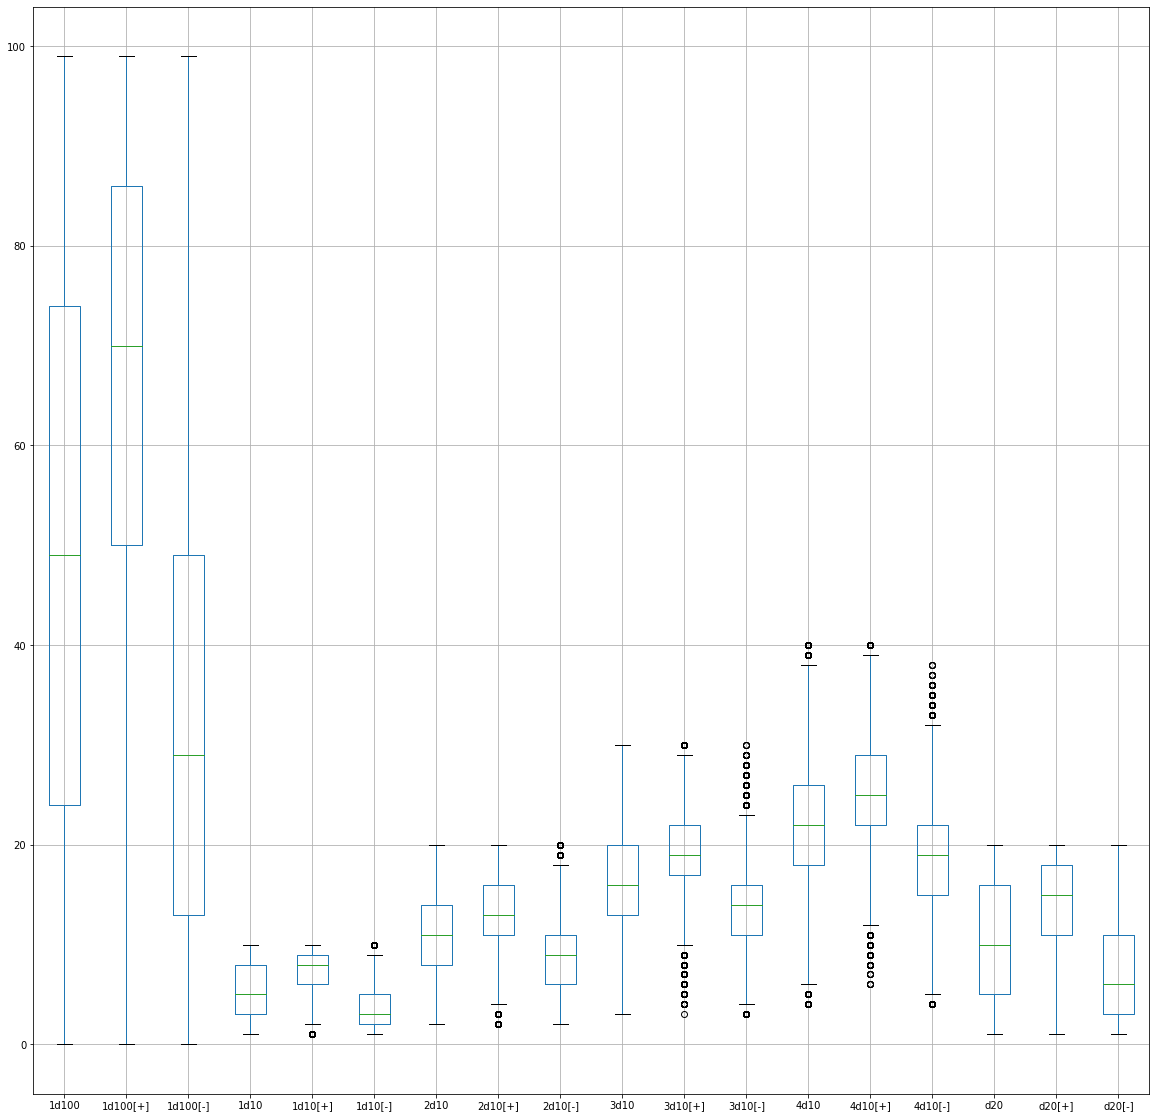

In [55]:
df.boxplot(figsize=(20, 20))

array([[<AxesSubplot:title={'center':'1d100'}>,
        <AxesSubplot:title={'center':'1d100[+]'}>,
        <AxesSubplot:title={'center':'1d100[-]'}>,
        <AxesSubplot:title={'center':'1d10'}>],
       [<AxesSubplot:title={'center':'1d10[+]'}>,
        <AxesSubplot:title={'center':'1d10[-]'}>,
        <AxesSubplot:title={'center':'2d10'}>,
        <AxesSubplot:title={'center':'2d10[+]'}>],
       [<AxesSubplot:title={'center':'2d10[-]'}>,
        <AxesSubplot:title={'center':'3d10'}>,
        <AxesSubplot:title={'center':'3d10[+]'}>,
        <AxesSubplot:title={'center':'3d10[-]'}>],
       [<AxesSubplot:title={'center':'4d10'}>,
        <AxesSubplot:title={'center':'4d10[+]'}>,
        <AxesSubplot:title={'center':'4d10[-]'}>,
        <AxesSubplot:title={'center':'d20'}>],
       [<AxesSubplot:title={'center':'d20[+]'}>,
        <AxesSubplot:title={'center':'d20[-]'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

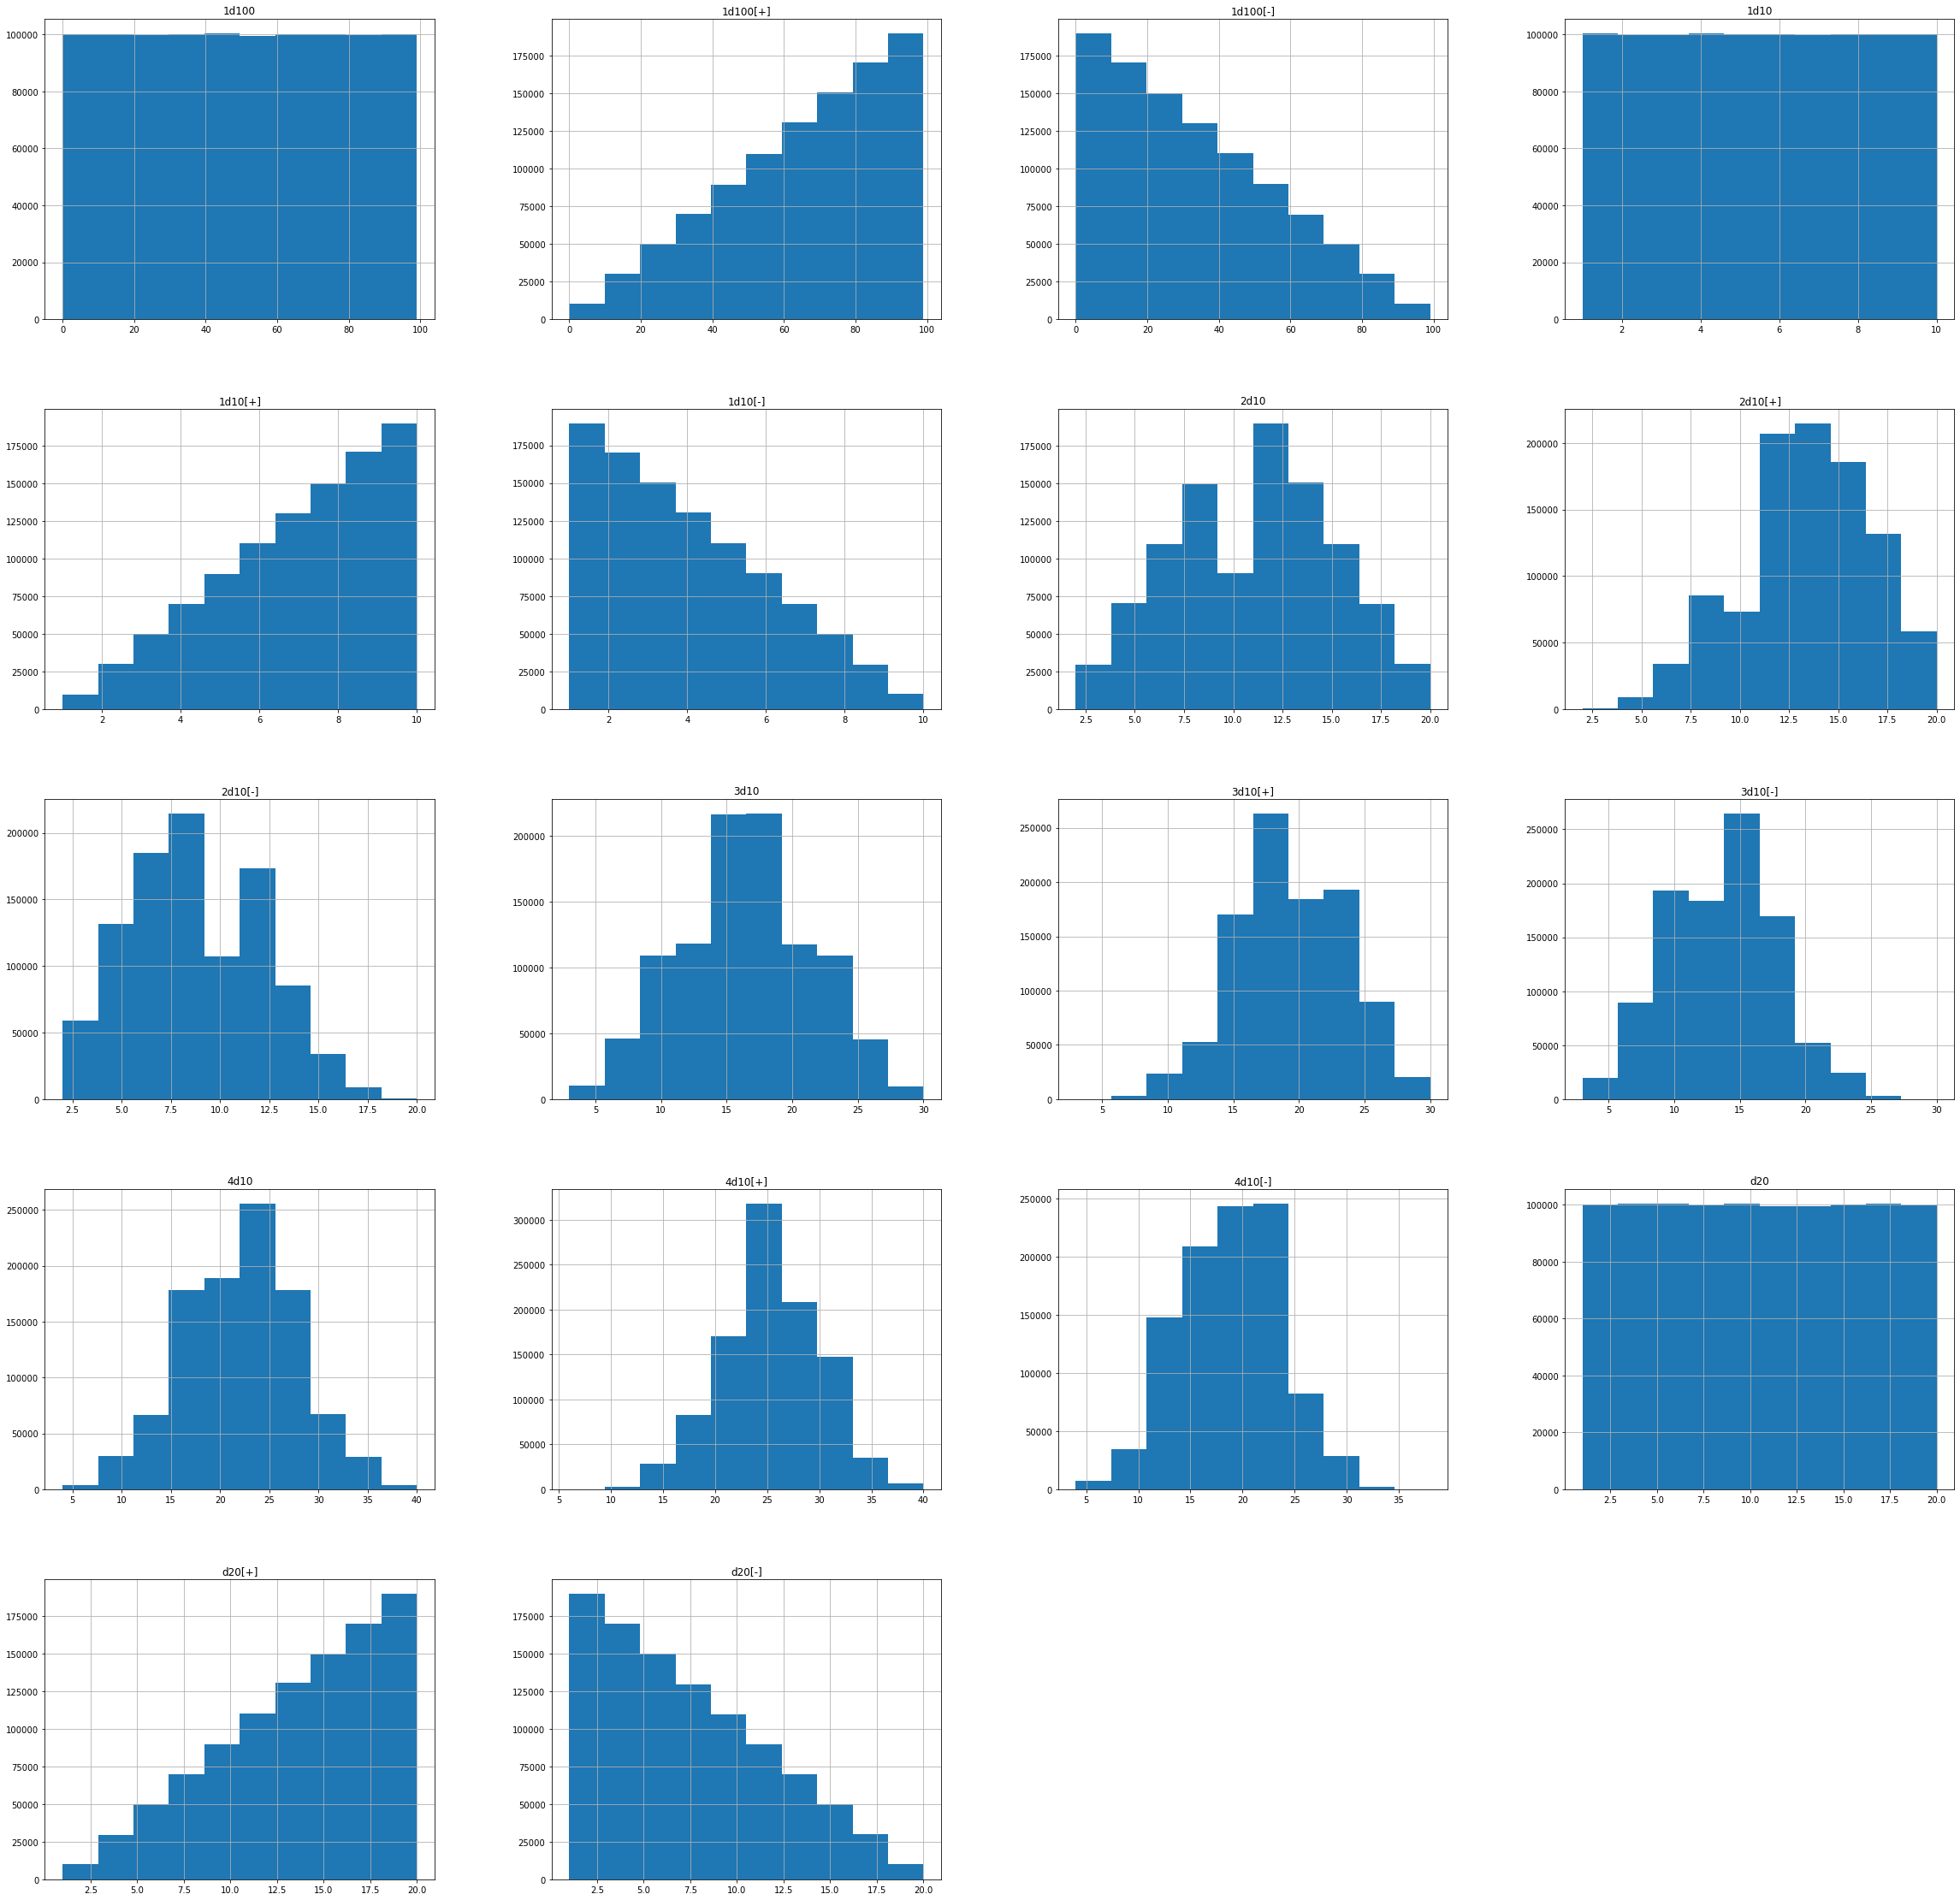

In [56]:
df.hist(figsize=(40, 40))

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

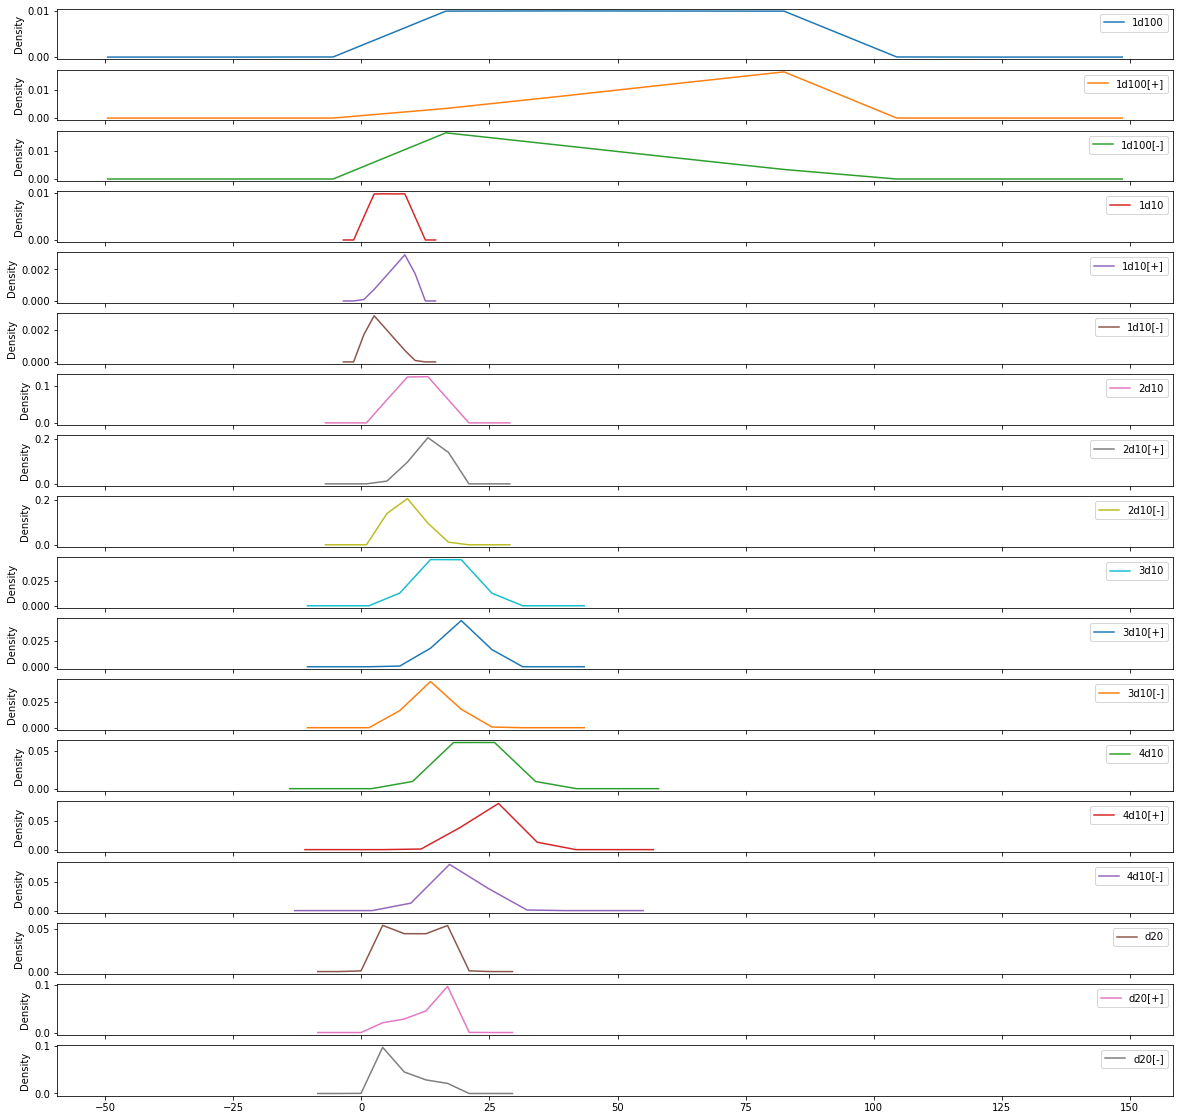

In [57]:
df.plot.density(figsize=(20, 20), ind=10, subplots=True)